In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#load some data in a pandas dataframe

df = None
#df = pd.read_csv("C:/Users/.../Oilanalysis.csv") #for those who would like to work from a local drive
df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [23]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

df.dtypes

Age                 object
BRSTVD             float64
ISO 4406 large     float64
ISO 4406 medium    float64
ISO 4406 small     float64
LNF-ROET           float64
LNF-CUT            float64
LNF-FIB            float64
LNF-FW             float64
LNF-NMW            float64
LNF-SSW            float64
LNF-UNC            float64
P                    int64
V                    int64
AL                   int64
BA                   int64
CA                   int64
CR                   int64
CU                   int64
FE                   int64
MG                   int64
MN                   int64
NA                   int64
NI                   int64
PB                   int64
SI                   int64
SN                   int64
ZN                   int64
LI                   int64
TAN                float64
TBN                float64
VIS40              float64
VIS99              float64
VLAMCC             float64
WATER              float64
dtype: object

In [4]:
# get a preview on the data

#df.head(3)
#df.describe()
#len(df["BRSTVD"])

In [5]:
# plot histograms of the data in the dataframe
# causal effects of the columns that just contain one value remain invisible "ceteris paribus"
# check for outliers and explain them eventually

#for col in df.columns: 
#    try:      
#        df[col] = pd.to_numeric(df[col]) 
#        df.hist(column=col)
#    except ValueError:
#        print("The column "+col+' can not be represented as a histogram')

In [6]:
#create a correlation matrix to check for pairwise linear dependencies among the columns

#dummy=df.iloc[:,1:]    #remove the "Age" column that is not numerical
#dummy.corr(min_periods=15)
#plt.matshow(dummy.corr(min_periods=15))
#plt.show()
#print(dummy.columns)

#del dummy

In [24]:
# convert categorical variables into indicator functions

df = pd.get_dummies(df,columns=["Age"])
#df


In [25]:
# define the response variable and convert it into an np.array

y=np.array(df["Age_After 1 year"])


In [26]:
#perform k-means clustering to check for nonlinear dependencies among the df columns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier


In [27]:
# define the explanatory variables

X=df.iloc[:,:34]
X_names=df.iloc[:,:34].columns


In [31]:
# impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=20, weights="distance")
X=imputer.fit_transform(X)


In [33]:
# create a training set and a validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify=y)

#print('X_train Shape:', X_train.shape)
#print('y_train Shape:', y_train.shape)
#print('X_test Shape:', X_test.shape)
#print('Y_test Shape:', y_test.shape)


In [34]:
# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 2000, random_state = None)

# Train the model on training data

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=2000)

In [35]:
# validate the random forest using the test set

predictions = rf.predict(X_test)


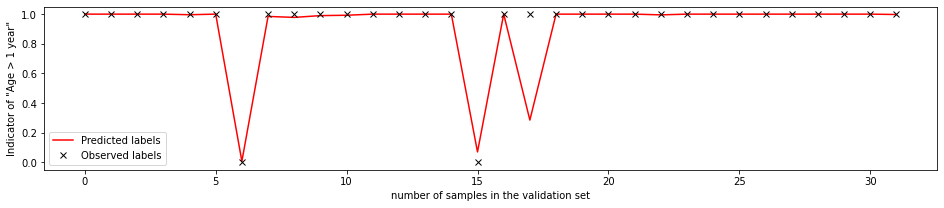

In [36]:
# plot the result of the validation

plt.figure(figsize=(16,3))
plt.plot(range(len(predictions)), predictions, '-', label="Predicted labels", color="red")
plt.plot(range(len(y_test)), y_test, 'x', label="Observed labels",color="black")
plt.xlabel('number of samples in the validation set')
plt.ylabel('Indicator of "Age > 1 year"')
plt.legend()
plt.show()


[Text(334.79999999999995, 453.0, 'CU <= 1.5\nmse = 0.059\nsamples = 60\nvalue = 0.938'),
 Text(223.2, 271.8, 'MG <= 8.5\nmse = 0.122\nsamples = 6\nvalue = 0.143'),
 Text(111.6, 90.59999999999997, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(334.79999999999995, 90.59999999999997, 'mse = 0.0\nsamples = 5\nvalue = 0.0'),
 Text(446.4, 271.8, 'mse = 0.0\nsamples = 54\nvalue = 1.0')]

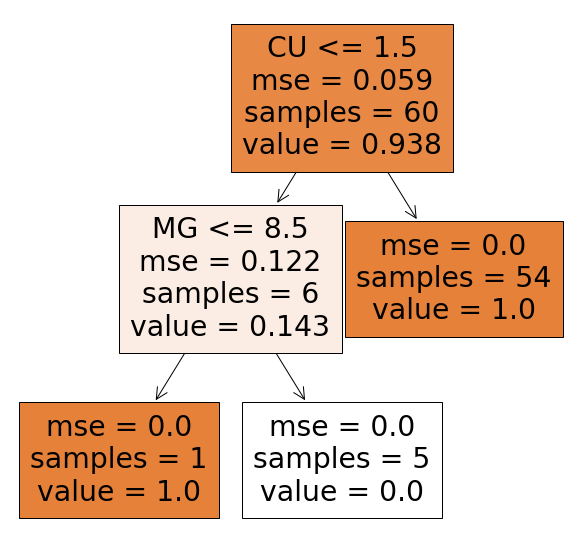

In [39]:
# depict a tree from the forest

plt.figure(figsize=(10,10))
clf = rf.estimators_[5]
tree.plot_tree(clf,feature_names=X_names, filled=True)


In [40]:
#plot the importance of the various explanatory variables

pd.DataFrame(rf.feature_importances_,index=X_names).sort_values(0,ascending=False)


,0
CU,0.816834
VIS40,0.021612
VIS99,0.016744
WATER,0.011981
ISO 4406 large,0.009419
MG,0.009082
BRSTVD,0.009051
LNF-UNC,0.008582
FE,0.008507
CA,0.008396
